In [1]:
#Importing the necessary packages
import cv2
import matplotlib.pyplot as plt
import joblib

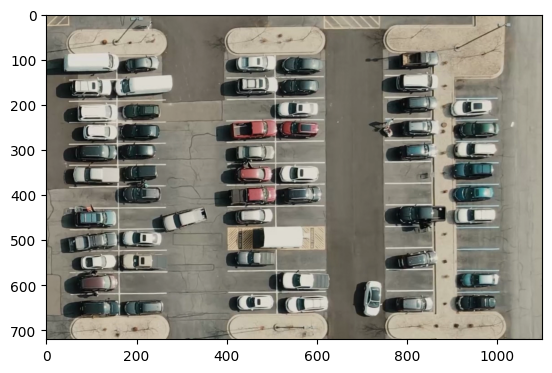

In [2]:
#Viewing a representative image of the lot for the purpose of drawing rectangles around parking spaces.
img_park=cv2.imread(r"C:\Users\Hp\Desktop\GIT PROJECTS\Automated Parking Detection Project\img.png")
img=cv2.cvtColor(img_park,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
# Drawing the first rectangle and determining the length and width of the rectangles.
img=cv2.cvtColor(img_park,cv2.COLOR_BGR2RGB)
cv2.rectangle(img,pt1=(50,97),pt2=(157,141),color=(255,0,0),thickness=1)
cv2.imshow("Image",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
# Writing down the length and the width of the rectangles.
length_rect=157-50
width_rect=141-97

In [5]:
# Creating an empty list for storing the coordinates of the reference points of the rectangles or loading the existing file if any.
try:
    poslist=joblib.load(r"C:\Users\Hp\Desktop\GIT PROJECTS\Automated Parking Detection Project\positionlist.sav")
except:
    poslist=[]

In [6]:
# Creating a function for registering valid mouse clicks into poslist.
def mouseclick(events,x,y,flags,params):
    if events==cv2.EVENT_LBUTTONDOWN:
        poslist.append((x,y))
    if events==cv2.EVENT_RBUTTONDOWN:
        for i,pos in enumerate(poslist):
            x1,y1=pos
            if x1<=x<=x1+length_rect and y1<=y<=y1+width_rect:
                poslist.pop(i)

In [7]:
#Drawing all the rectangles using a while loop.
while True:
    img=cv2.cvtColor(img_park,cv2.COLOR_BGR2RGB)
    for pos in poslist:
        cv2.rectangle(img,pt1=pos,pt2=(pos[0]+length_rect,pos[1]+width_rect),color=(0,0,255),thickness=1)
    cv2.imshow("Image",img)
    cv2.setMouseCallback("Image",mouseclick)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cv2.destroyAllWindows()

In [8]:
#Saving poslist for future uses.
joblib.dump(poslist,"positionlist.sav")

['positionlist.sav']